In [1]:
from astro import Astro
from tides import Tides

tides = Tides('example_noaa_file.TXT')
sun = Astro(str(tides.latitude), str(tides.longitude), tides.timezone, tides.year, 'Sun')
moon = Astro(str(tides.latitude), str(tides.longitude), tides.timezone, tides.year, 'Moon')

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
monthnum = '07'  # @@@ change this to test other months
firstday, lastday = '15', '21'  # @@@ DITTO

month_of_tide = tides.all_tides[tides.year + '-' + monthnum]
month_of_sun = sun.heights[tides.year + '-' + monthnum]
month_of_moon = moon.heights[tides.year + '-' + monthnum]

# the zero lines for each variable to be plotted
Tz = np.zeros(len(month_of_tide.index))
Sz = np.zeros(len(month_of_sun.index))
Mz = np.zeros(len(month_of_moon.index))

tide_min = tides.annual_min
tide_max = tides.annual_max
place_name = tides.station_name + ', ' + tides.state
first_day = tides.year + '-' + monthnum + '-' + firstday + ' 00:00'
last_day = tides.year + '-' + monthnum + '-' + lastday + ' 23:59'
month_title = month_of_tide.index[0].to_pydatetime().strftime('%B')

In [26]:
def _plot_a_week(week_number, start_time, stop_time):
    '''Internal function. Works on pre-defined gridspec gs and assumes
    variables like tide_min, tide_max, month_of_tide/moon/sun already
    defined in outer scope.
    Week numbers start at 1 for the first week of the month and can go up to 6.'''
    
    if week_number == 1:
        gs_ind_1, gs_ind_2 = 0, 1
    elif week_number == 2:
        gs_ind_1, gs_ind_2 = 2, 3
    elif week_number == 3:
        gs_ind_1, gs_ind_2 = 4, 5
    elif week_number == 4:
        gs_ind_1, gs_ind_2 = 6, 7
    elif week_number == 5:
        gs_ind_1, gs_ind_2 = 8, 9
    elif week_number == 6:
        gs_ind_1, gs_ind_2 = 10, 11
    
    # sun and moon heights on top
    ax1 = plt.subplot(gs[gs_ind_1,0])
    ax1.fill_between(month_of_sun.index, month_of_sun, Sz,
                     color='#FFEB00', alpha=1)
    ax1.fill_between(month_of_moon.index, month_of_moon, Mz,
                     color='#D7A8A8', alpha=0.2)
    ax1.axis([start_time, stop_time, 0, 1])
    ax1.set_xticks([])
    ax1.set_yticks([])
    for axis in ['top','left','right']:
        ax1.spines[axis].set_linewidth(1.5)
    ax1.spines['bottom'].set_visible(False)
    
    # tide magnitudes below
    ax2 = plt.subplot(gs[gs_ind_2,0])
    ax2.fill_between(month_of_tide.index, month_of_tide, Tz,
                     color='#52ABB7', alpha=0.8)
    ax2.axis([start_time, stop_time, tide_min, tide_max])
    ax2.set_xticks([])
    ax2.set_yticks([])
    for axis in ['bottom','left','right']:
        ax2.spines[axis].set_linewidth(1.5)
    ax2.spines['top'].set_linewidth(0.5)



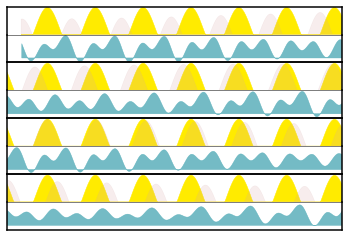

In [27]:
    
gs = gridspec.GridSpec(8, 1, hspace=0.0)

_plot_a_week(1, '2015-07-01 00:00', '2015-07-07 23:59')
_plot_a_week(2, '2015-07-08 00:00', '2015-07-14 23:59')
_plot_a_week(3, '2015-07-15 00:00', '2015-07-21 23:59')
_plot_a_week(4, '2015-07-22 00:00', '2015-07-28 23:59')
#_plot_a_week(5, '2015-07-29 00:00', '2015-07-31 23:59') <<<---doesn't work, stretched out


plt.show()
